# [ICTCOG AI Academy] 7기 고급시각저녁반
## Style Transfer
- 이미지의 고유의 패턴을 찾아서 다른 이미지에 입힘
  - 예 한 화가의 화풍을 이미지에 입힘

> classification 은 구분을 잘 하도록 특징/패턴을 추출

- contents layer에서 특징 추출
 - 각 다름을 밝혀내고 각 객체 내에서도 다른것 발견
- Style Layer
  - 복잡하고 고유한 특징
- 유사한 정도에 따라 뒤엎기 때문에 배경과 전경에 다르게 적용되어 합성

In [ ]:
import tensorflow as tf

In [ ]:
import IPython.display as display #Ipython 

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image    #PIL 이미지 쉽게 관리mport IPython.display as display #Ipython 

- 이미지를 불러와서 Numpy 인경우 Tensor로 , 아닌경우 Numpy로 만든 후 Tensor로 

#### PIL 
- Python Image Library
- 기본 Numpy 데이터 형태


In [ ]:
from PIL import Image

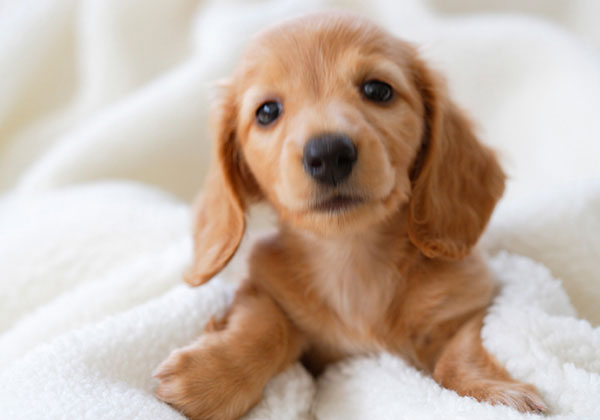

In [ ]:
x= Image.open('dog.jpg')
x

> 이미지와 텐서는 직접적으로 호환하려면 별도의 과정을 거쳐야함
- Tensor로 이미지 하나 불러오기
`tf.keras.preprocessing.Imaged_dataset_from_directory`

In [ ]:
type(tf.keras.preprocessing.image.load_img('dog.jpg')) #PIL

PIL.JpegImagePlugin.JpegImageFile

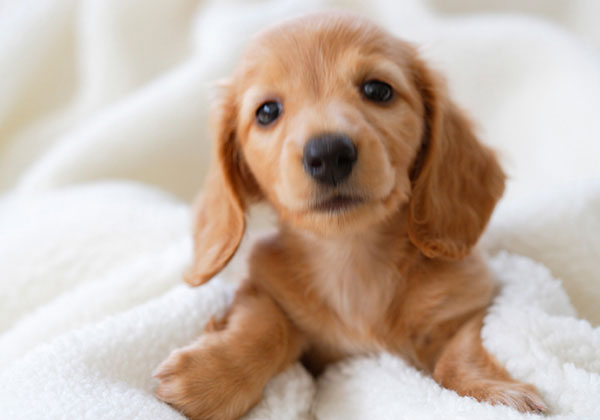

In [ ]:
tf.keras.preprocessing.image.load_img('dog.jpg')

In [ ]:
tf.io.decode_git #byte 타입 해석 

텐서를 이미지로 변경해주는 함수 생성해서 간편하게 사용

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)  #Numpy 
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

get_file
- 지정된 이름으로 다운로드해서 저장 
- 캐시 기법

In [ ]:
#get_file
content_path = tf.keras.utils.get_file('cat.jpg', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTiPLNqC5PjJnxpsBBO0Ocd_vLmRgncBX9dpw&usqp=CAU')
# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
style_path = tf.keras.utils.get_file('matisse.jpg','https://lh3.googleusercontent.com/proxy/7p9oBg6ilf-Aj4lxshUShDEUEUv1HAYNRHk00NUE_RR9Qc5Va61mLG3DbvooGvA0hITfOAEu5qCUB2ohQFQPL_eT6ax_98Xgy9QddzmH9Twq0rW66g-mc8t2zbjKeYNZofVgFNkCuYde92BZ7w')

In [ ]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')

# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

In [ ]:
content_path

'/root/.keras/datasets/cat.jpg'

In [ ]:
a=tf.io.read_file(content_path) # 바이트 형태로 데이터를 불러옴
a 

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x13\x16\x15\x15\x16\x18\x15\x1a\x18\x18\x18\x18\x15\x18\x17\x18\x18\x18\x17\x17\x17\x16\x15\x15\x17\x18\x1d( \x18\x1a%\x1d\x15\x17!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x17\x10\x10\x1a-\x1d\x1d\x1d--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x00\x01\x07\xff\xc4\x00=\x10\x00\x01\x03\x02\x04\x04\x03\x06\x04\x05\x04\x02\x03\x01\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05Qaq"\x81\x91\x06\x132\xa1\xb1\xf0B\xc1\xd1\xe1\x14Rbr\xf1#3\x82\x92\x15\xc2C\xa2\xb2\x17\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\xff\xc4\x00\x1f\x11\x01\x01\x01\x01\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\

In [ ]:
tf.io.decode_image(a) #바이트에서 텐서 형태의 이미지로 해석(범용적)

<tf.Tensor: shape=(183, 275, 3), dtype=uint8, numpy=
array([[[190, 194, 203],
        [196, 200, 209],
        [206, 210, 219],
        ...,
        [117,  99,  89],
        [117,  99,  89],
        [117,  99,  89]],

       [[193, 197, 206],
        [197, 201, 210],
        [204, 208, 217],
        ...,
        [117,  99,  89],
        [117,  99,  89],
        [117,  99,  89]],

       [[197, 202, 208],
        [198, 203, 209],
        [201, 206, 212],
        ...,
        [118, 100,  90],
        [118, 100,  90],
        [118, 100,  90]],

       ...,

       [[204, 208, 220],
        [202, 206, 218],
        [199, 203, 215],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[199, 203, 215],
        [199, 203, 215],
        [199, 203, 215],
        ...,
        [147, 147, 147],
        [147, 147, 147],
        [147, 147, 147]],

       [[197, 201, 213],
        [200, 204, 216],
        [204, 208, 220],
        ...,
        [146, 146, 14

In [ ]:
tf.image.decode_image is tf.io.decode_image

True

In [ ]:
tf.io.decode_jpeg(a)

<tf.Tensor: shape=(183, 275, 3), dtype=uint8, numpy=
array([[[190, 194, 203],
        [196, 200, 209],
        [206, 210, 219],
        ...,
        [117,  99,  89],
        [117,  99,  89],
        [117,  99,  89]],

       [[193, 197, 206],
        [197, 201, 210],
        [204, 208, 217],
        ...,
        [117,  99,  89],
        [117,  99,  89],
        [117,  99,  89]],

       [[197, 202, 208],
        [198, 203, 209],
        [201, 206, 212],
        ...,
        [118, 100,  90],
        [118, 100,  90],
        [118, 100,  90]],

       ...,

       [[204, 208, 220],
        [202, 206, 218],
        [199, 203, 215],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[199, 203, 215],
        [199, 203, 215],
        [199, 203, 215],
        ...,
        [147, 147, 147],
        [147, 147, 147],
        [147, 147, 147]],

       [[197, 201, 213],
        [200, 204, 216],
        [204, 208, 220],
        ...,
        [146, 146, 14

## 입력 시각화
- Tensor로 변경해서 최적화 가능
- Numpy -> Tensor로 변환하는 리소스 줄임

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)           # 바이트 형태로 데이터를 불러와서 해석 
  img = tf.image.decode_image(img, channels=3) # 바이트 -> 텐서 형태의 이미지
  img = tf.image.convert_image_dtype(img, tf.float32) 

  shape = tf.cast(tf.shape(img)[:-1], tf.float32) #scaling
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

이미지를 출력하기 위한 간단한 함수를 정의합니다:

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0) #

  plt.imshow(image)
  if title:
    plt.title(title)

In [ ]:
# 1기준 차원축소용으로
x=np.array([[2],[3],[4]]) #3x1
np.squeeze(x)

array([2, 3, 4])

In [ ]:
y=np.arange(6).reshape(3,1,2,1) #2개인 경우 axis 조절해서 축소 가능
np.squeeze(y,axis=1)

array([[[0],
        [1]],

       [[2],
        [3]],

       [[4],
        [5]]])

In [ ]:
np.squeeze(y)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()

In [ ]:
X_train =X_train.reshape(60000,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
np.squeeze(X_train).shape

(60000, 28, 28)

In [ ]:
x=np.array([[2],[3],[4]])
tf.squeeze(x)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 3, 4])>

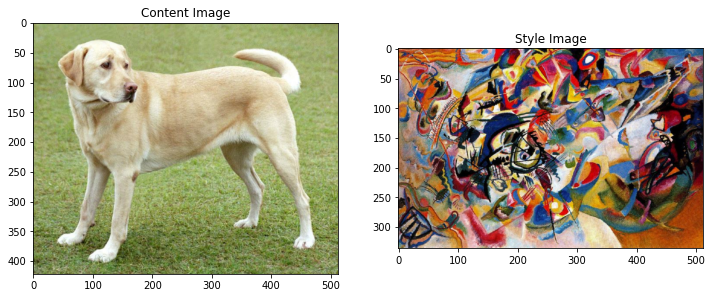

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

### Trnasfer Learning
1. tf.keras.applications
2. [**tensorflow_hub**]( https://tensorflow.org/hub)
  - KerasLayer 
  - hub_module
  - tf1,tf2
  - https://tensorflow.org/hub
  -  아직 업로드 되어 있지 않음

In [ ]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

In [ ]:
hub_module.summary() #keras 모델이 아님 

AttributeError: ignored

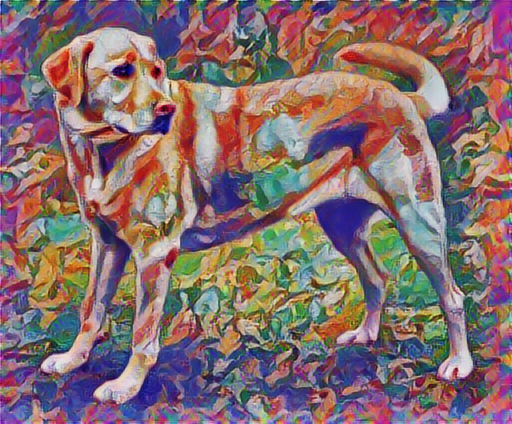

In [ ]:
#함수형 패러다임
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

레이어가 깊어지면 구체적인 특성을 추출
- 모델 , 레이어 마다 상이이

In [ ]:
vgg19= tf.keras.applications.VGG19(include_top=True) # 모델이 단순해서 커스터마이징 용이
vgg19

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

In [ ]:
im=tf.keras.applications.vgg19.preprocess_input(content_image)
im=tf.image.resize(im,(224,224)) #입력크기 맞춰줌줌

In [ ]:
tf.argmax(vgg19(im)[0]) #644번째가 가장 큼

<tf.Tensor: shape=(), dtype=int64, numpy=644>

In [ ]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(vgg19(im).numpy())[0] #넘파이만 받음
[(class_name, prob) for (number, class_name, prob) in predicted_top_5] #확률 가장 높은 5개

[('matchstick', 0.07572037),
 ('nematode', 0.056986917),
 ('digital_clock', 0.031263966),
 ('lighter', 0.026412766),
 ('spotlight', 0.026081098)]

In [ ]:
vgg19.summary() #

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

>ZFnet : 컨볼루션 층 시각화


스타일의 경우
컨볼루션 누적하지 않고 한번만 컨볼루션 시킴


In [ ]:
vgg= tf.keras.applications.VGG19(include_top=False)  #이미지 크기 상관없이 입력 받을 수 있음 

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg.layers[1]

- 바로 적용하면 이미지에 유사도가 작으면 부자연스럽기 때문에 convolution 에 여러번 통과시키면 유사하게 되지만 원본의 형태와 멀어지게 됨
- 원본을 어느정도 유지해야 하므로 하나의 convolution만 통과해서 유사도를 가장 크게 만들어서 적용 

In [ ]:
vgg.get_layer('block5_conv1')

In [ ]:
#모델의 중간층 선택
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']#5개 레이어
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

함수로 만들어서 사용하면 간편

In [ ]:
def vgg_layers(layer_names):
  vgg = tf.keras.applications.VGG19(include_top=False)
  vgg.trainable = False
  #for i in layers :
  #  vgg.get_layres(i).output
  outputs = [vgg.get_layer(name).output for name in layer_names] #comprehension 으로 for ans
  model = tf.keras.Model([vgg.input], outputs)
  return model

In [ ]:
style_extractor=vgg_layers(style_layers)
style_outputs =style_extractor(style_image)

#### 유사도 계산
- 상관관계를 구하는 식 이용
- 비슷할수록, 상관관계가 클수록 이질감 적음 


$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

batch 사이즈 만큼 들어옴 
> 아인슈타인 summation `tf.linalg.einsum` 

In [ ]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

## 스타일과 콘텐츠 추출하기


스타일과 콘텐츠 텐서를 반환하는 모델을 만듭시다.

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers) #두 모델을 리스트의 합침
    self.style_layers = style_layers  #특징을 찾아서 컨텐츠에 덮어 씌움lass StyleContentModel(tf.keras.models.Model):
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "[0,1] 사이의 실수 값을 입력으로 받습니다"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs) #재처리  
    outputs = self.vgg(preprocessed_input)
    
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

합성이 잘 되도록 변함볼루션 시킬때마다 이미지가 가장 합성이 잘 되도록 변함  

In [ ]:
[1,2,]+[3] #

[1, 2, 3]

이미지가 입력으로 주어졌을때, 이 모델은 `style_layers`의 스타일과 `content_layers`의 콘텐츠에 대한 그람 행렬을 출력합니다:

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('스타일:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    크기: ", output.numpy().shape)
  print("    최솟값: ", output.numpy().min())
  print("    최댓값: ", output.numpy().max())
  print("    평균: ", output.numpy().mean())
  print()

print("콘텐츠:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    크기: ", output.numpy().shape)
  print("    최솟값: ", output.numpy().min())
  print("    최댓값: ", output.numpy().max())
  print("    평균: ", output.numpy().mean())


스타일:
   block1_conv1
    크기:  (1, 422, 512, 64)
    최솟값:  0.0
    최댓값:  550.1154
    평균:  15.226082

   block2_conv1
    크기:  (1, 211, 256, 128)
    최솟값:  0.0
    최댓값:  3191.6501
    평균:  89.55595

   block3_conv1
    크기:  (1, 105, 128, 256)
    최솟값:  0.0
    최댓값:  4486.9497
    평균:  81.42939

   block4_conv1
    크기:  (1, 52, 64, 512)
    최솟값:  0.0
    최댓값:  13530.511
    평균:  351.3847

   block5_conv1
    크기:  (1, 26, 32, 512)
    최솟값:  0.0
    최댓값:  4270.3394
    평균:  33.99466

콘텐츠:
   block5_conv2
    크기:  (1, 26, 32, 512)
    최솟값:  0.0
    최댓값:  2410.8796
    평균:  13.764149


## 경사하강법 실행

이제 스타일과 콘텐츠 추출기를 사용해 스타일 전이 알고리즘을 구현할 차례입니다. 타깃에 대한 입력 이미지의 평균 제곱 오차를 계산한 후, 오차값들의 가중합을 구합니다.

스타일과 콘텐츠의 타깃값을 지정합니다:

In [ ]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

최적화시킬 이미지를 담을 `tf.Variable`을 정의하고 콘텐츠 이미지로 초기화합니다. (이때 `tf.Variable`는 콘텐츠 이미지와 크기가 같아야 합니다.):

In [ ]:
image = tf.Variable(content_image)

픽셀 값이 실수이므로 0과 1 사이로 클리핑하는 함수를 정의합니다:

In [ ]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

옵티마이저를 생성합니다. 참조 연구에서는 LBFGS를 추천하지만, `Adam`도 충분히 적합합니다:

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

최적화를 진행하기 위해, 전체 오차를 콘텐츠와 스타일 오차의 가중합으로 정의합니다:

In [ ]:
style_weight=1e-2
content_weight=1e4

def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    #목적 : 실제와 예측간의 차이를 loss function으로 만들어 최소화
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

> Variational Method : 실제값을 구할수없기 때문에 대표값을 이용

- 비슷할수록 자연스러움

In [ ]:
@tf.function()
def train_step(image): 
  with tf.GradientTape() as tape: #학습
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

---
edge detection: convolution 곱해서 물체의 선 찾음

- 가장 실제처럼 보이게 하기 위해 convolution 사용


In [ ]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2,2,3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2,2,4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

In [ ]:
plt.figure(figsize=(14,10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1,2,1)
imshow(clip_0_1(sobel[...,0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1,2,2)
imshow(clip_0_1(sobel[...,1]/4+0.5), "Vertical Sobel-edges")

---
### [DeepDream](https://www.tensorflow.org/tutorials/generative/deepdream)
- 꿈꾸는 것 처럼 만듦
- StyleTransfer와 원리는 동일함
  - 컨볼루션이 레이러를 지나가고 어떤 특징을 찾고 어떻게 변화햇는지
- 레이어를 통과시키면 객체가 

In [ ]:
import numpy as np

import matplotlib as mpl

import IPython.display as display
import PIL.Image

from tensorflow.keras.preprocessing import image

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'

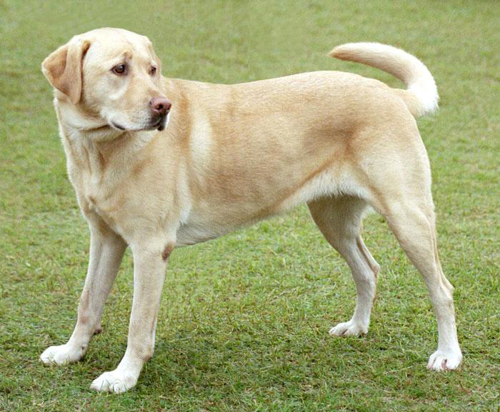

In [ ]:
# 이미지를 내려받아 넘파이 배열로 변환합니다.
def download(url, max_dim=None):
  name = url.split('/')[-1]
  image_path = tf.keras.utils.get_file(name, origin=url)
  img = PIL.Image.open(image_path)
  if max_dim:
    img.thumbnail((max_dim, max_dim))
  return np.array(img)

# 이미지를 정규화합니다.
def deprocess(img):
  img = 255*(img + 1.0)/2.0
  return tf.cast(img, tf.uint8)

# 이미지를 출력합니다.
def show(img):
  display.display(PIL.Image.fromarray(np.array(img)))


# 이미지의 크기를 줄여 작업이 더 용이하도록 만듭니다.
original_img = download(url, max_dim=500)
show(original_img)
display.display(display.HTML('Image cc-by: <a "href=https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>'))

In [ ]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

In [ ]:
# 선택한 층들의 활성화값을 최대화
names = ['mixed3', 'mixed5']
layers = [base_model.get_layer(name).output for name in names]

# feature extractor 
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

고유한 이미지의 패턴 찾기
- 컨볼루션의 연산결과가 크다 == 같은 패턴이다의 연산결과가 크다


In [ ]:
def calc_loss(img, model):
  # 이미지를 순전파시켜 모델의 활성화값을 얻습니다.
  # 이미지의 배치(batch) 크기를 1로 만듭니다.
  img_batch = tf.expand_dims(img, axis=0)
  layer_activations = model(img_batch)
  if len(layer_activations) == 1:
    layer_activations = [layer_activations]

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return  tf.reduce_sum(losses)

In [ ]:
vgg.trainable

True

최종 나온 이미지들은 목표에 이해서 학습된 것들 

In [ ]:
ice=tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

In [ ]:
ice(image)

<tf.Tensor: shape=(1, 11, 14, 2048), dtype=float32, numpy=
array([[[[0.65967226, 0.        , 0.        , ..., 1.6811173 ,
          0.        , 0.        ],
         [0.2852361 , 0.        , 0.6601849 , ..., 1.4026476 ,
          0.        , 0.        ],
         [0.        , 0.        , 0.11169842, ..., 0.5403873 ,
          0.        , 0.        ],
         ...,
         [0.        , 3.891078  , 0.30093196, ..., 0.71414554,
          1.0254906 , 0.        ],
         [0.        , 1.5340681 , 0.10501423, ..., 0.95188004,
          0.5863767 , 0.        ],
         [0.        , 0.24603938, 0.        , ..., 1.0749254 ,
          0.10360603, 0.        ]],

        [[0.42974684, 0.25355092, 0.28324017, ..., 1.1310503 ,
          0.        , 0.        ],
         [0.        , 0.        , 0.20794047, ..., 0.7745291 ,
          0.        , 0.        ],
         [0.5698117 , 0.        , 0.10543202, ..., 0.19575155,
          0.23770945, 0.16036716],
         ...,
         [0.        , 2.10091